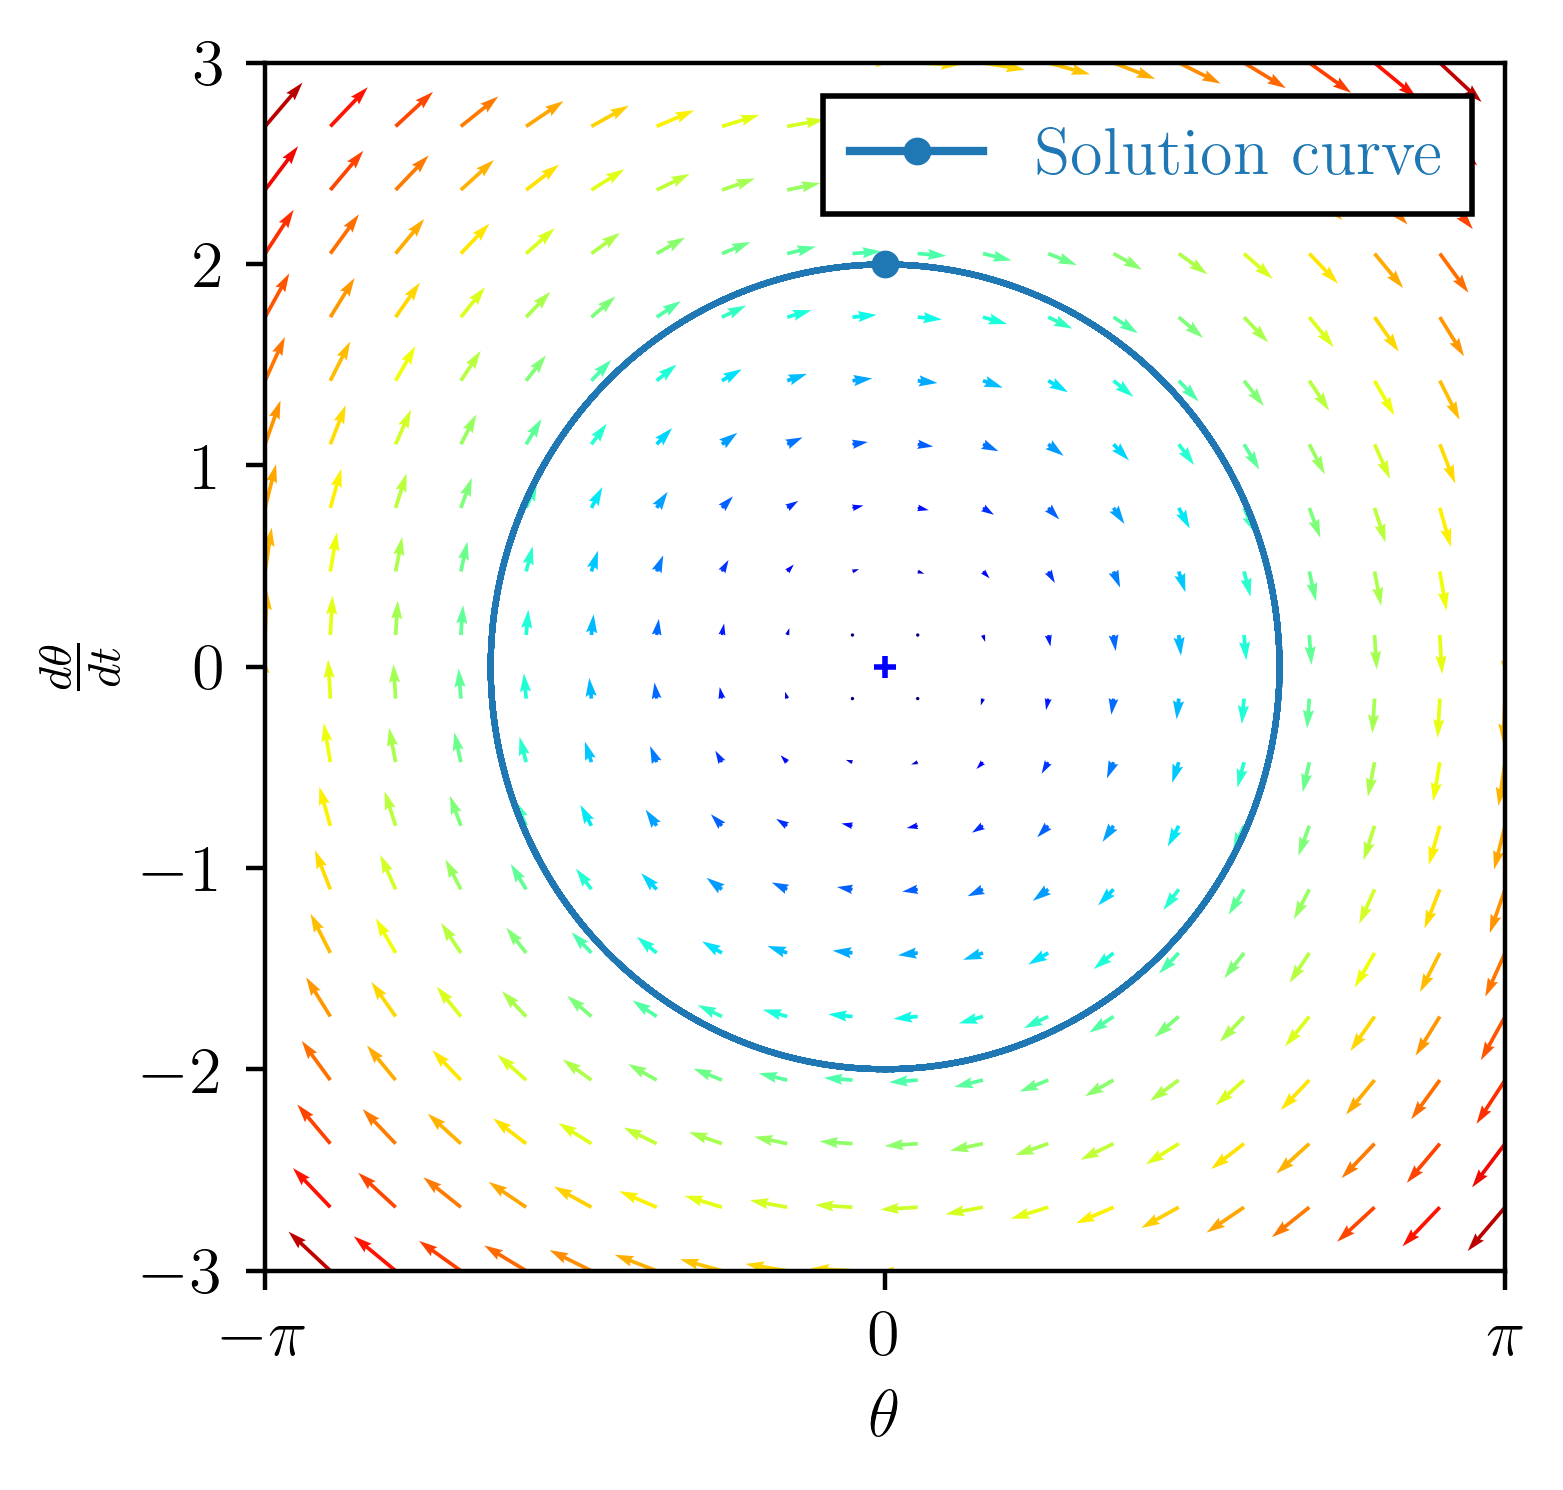

In [21]:
# Based on https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 12})
rc('text', usetex=True)

# Plot settings.
figure = plt.figure(figsize=(4, 4), dpi=400)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$')
plt.xlim([-np.pi, np.pi])
plt.ylim([-3, 3])
plt.xticks(np.arange(-np.pi, np.pi+np.pi, step=(np.pi)), [r'$-\pi$',r'0',r'$\pi$'])

q = 0 # Friction coefficient.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

# Definition of ODE separated in outputs.
def f(Y, t):
    y1, y2 = Y
    return [y2, -(g/L)*y1-(q/m)*y2]

#
# Creating phase picture as vector map.
#

# Input values for the function.
xin = np.linspace(-np.pi, np.pi, 20)
yin = np.linspace(-3, 3, 20)
Y1, Y2 = np.meshgrid(xin, yin) # Combining input values in an array.

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # Defining empty vector arrays for horizontal and vertical components.

# Cycling through every pair of inputs, calculating the output vectors for each and storing them in the empty vector arrays.
NI, NJ = Y1.shape 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        dy = f([x, y], t)
        u[i,j] = dy[0]
        v[i,j] = dy[1]

mag = np.sqrt(u*u+v*v) # Calculating magnitude of vectors for color map.
Q = plt.quiver(Y1, Y2, u, v, mag, cmap=plt.cm.jet) # Plotting vector map.
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], 'b+', markersize=4) # Plotting attractor points.

#
# Plotting some solutions of the differential equation.
#

# Importing package 'odeint' which calculates solutions of ODEs.
from scipy.integrate import odeint

# Plot settings.
colours = ['tab:blue']
labels = [r'Solution curve']

y1_0 = [0] # Values for the horizontal axis.
y2_0 = [2] # Values for the vertical axis.

sol = [] # Solution array.

# Cycling through initial values for the angular velocity and amplitude.
for i in range(len(y1_0)):
    span = np.linspace(0, 200, 2000) # Defining a span for the data points that will be calculated.
    p0 = [y1_0[i], y2_0[i]] # Starting point of each solution curve.
    plt.plot(y1_0[i], y2_0[i], marker='o', markersize=4, color=colours[i], label=labels[i]) # Plotting 'p0'.
    sol.append(odeint(f, p0, span)) # Calculating solution array 'sol' for ODE 'f' starting on point 'p0' and with span 'span'.
    plt.plot(sol[i][:, 0], sol[i][:, 1], linestyle='-', linewidth=1, color=colours[i]) # Plotting the solution curve from the solution array 'sol'.
    
plt.legend(labelcolor='linecolor', fancybox=False, facecolor='white', edgecolor='black', framealpha=1) # Legend settings.

plt.savefig('phase_approx_simple.svg', dpi=400, facecolor='w', edgecolor='w') # Saving figure.

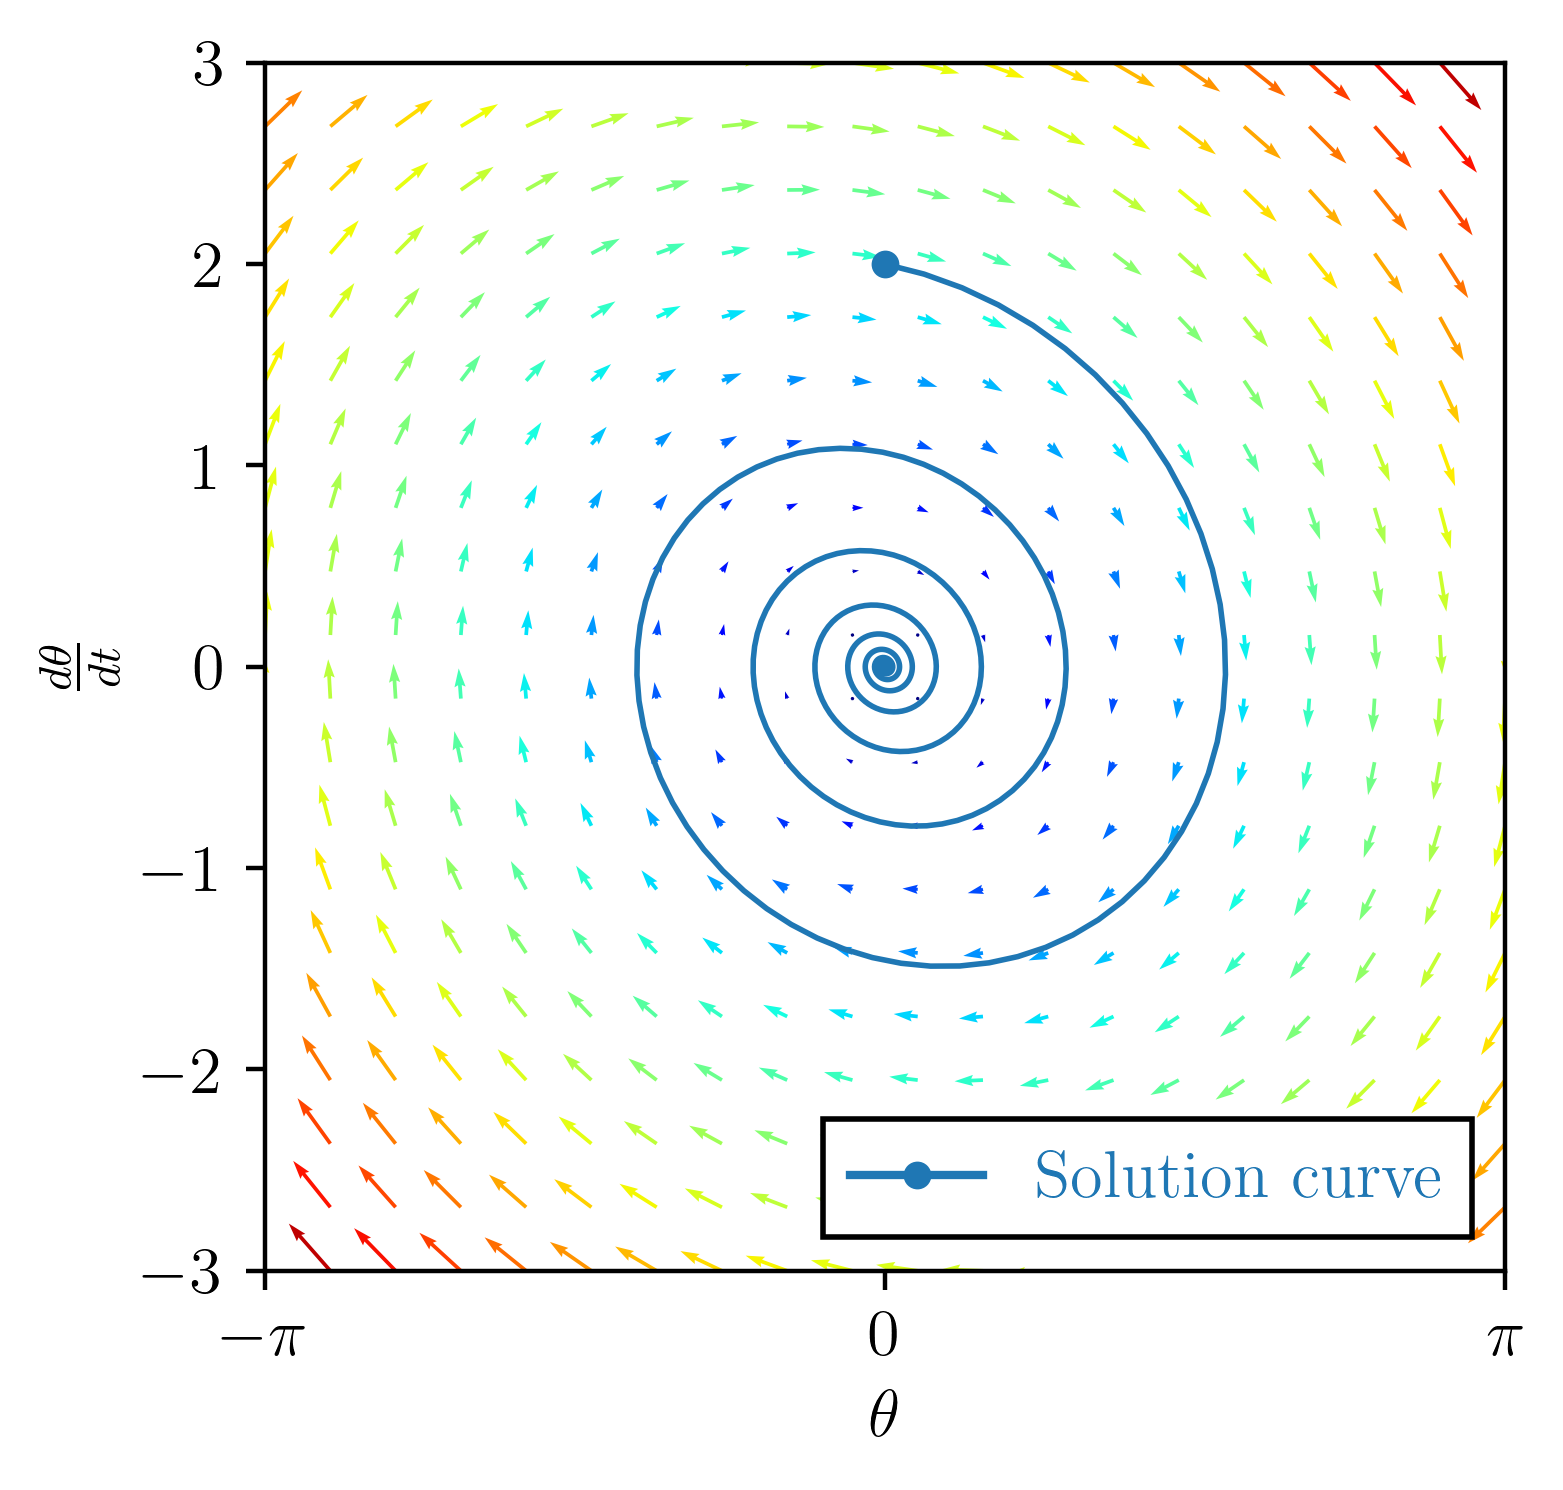

In [22]:
# Based on https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 12})
rc('text', usetex=True)

# Plot settings.
figure = plt.figure(figsize=(4, 4), dpi=400)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$')
plt.xlim([-np.pi, np.pi])
plt.ylim([-3, 3])
plt.xticks(np.arange(-np.pi, np.pi+np.pi, step=(np.pi)), [r'$-\pi$',r'0',r'$\pi$'])

q = 0.2 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

# Definition of ODE separated in outputs.
def f(Y, t):
    y1, y2 = Y
    return [y2, -(g/L)*y1-(q/m)*y2]

#
# Creating phase picture as vector map.
#

# Input values for the function.
xin = np.linspace(-np.pi, np.pi, 20)
yin = np.linspace(-3, 3, 20)
Y1, Y2 = np.meshgrid(xin, yin) # Combining input values in an array.

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # Defining empty vector arrays for horizontal and vertical components.

# Cycling through every pair of inputs, calculating the output vectors for each and storing them in the empty vector arrays.
NI, NJ = Y1.shape 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        dy = f([x, y], t)
        u[i,j] = dy[0]
        v[i,j] = dy[1]

mag = np.sqrt(u*u+v*v) # Calculating magnitude of vectors for color map.
Q = plt.quiver(Y1, Y2, u, v, mag, cmap=plt.cm.jet) # Plotting vector map.

#
# Plotting some solutions of the differential equation.
#

# Importing package 'odeint' which calculates solutions of ODEs.
from scipy.integrate import odeint

# Plot settings.
colours = ['tab:blue']
labels = [r'Solution curve']

y1_0 = [0] # Values for the horizontal axis.
y2_0 = [2] # Values for the vertical axis.

sol = [] # Solution array.

# Cycling through initial values for the angular velocity and amplitude.
for i in range(len(y1_0)):
    span = np.linspace(0, 200, 2000) # Defining a span for the data points that will be calculated.
    p0 = [y1_0[i], y2_0[i]] # Starting point of each solution curve.
    plt.plot(y1_0[i], y2_0[i], marker='o', markersize=4, color=colours[i], label=labels[i]) # Plotting 'p0'.
    sol.append(odeint(f, p0, span)) # Calculating solution array 'sol' for ODE 'f' starting on point 'p0' and with span 'span'.
    plt.plot(sol[i][:, 0], sol[i][:, 1], linestyle='-', linewidth=1, color=colours[i]) # Plotting the solution curve from the solution array 'sol'.
    
plt.legend(labelcolor='linecolor', fancybox=False, facecolor='white', edgecolor='black', framealpha=1, loc='lower right') # Legend settings.

plt.savefig('phase_approx_damped.svg', dpi=400, facecolor='w', edgecolor='w') # Saving figure.

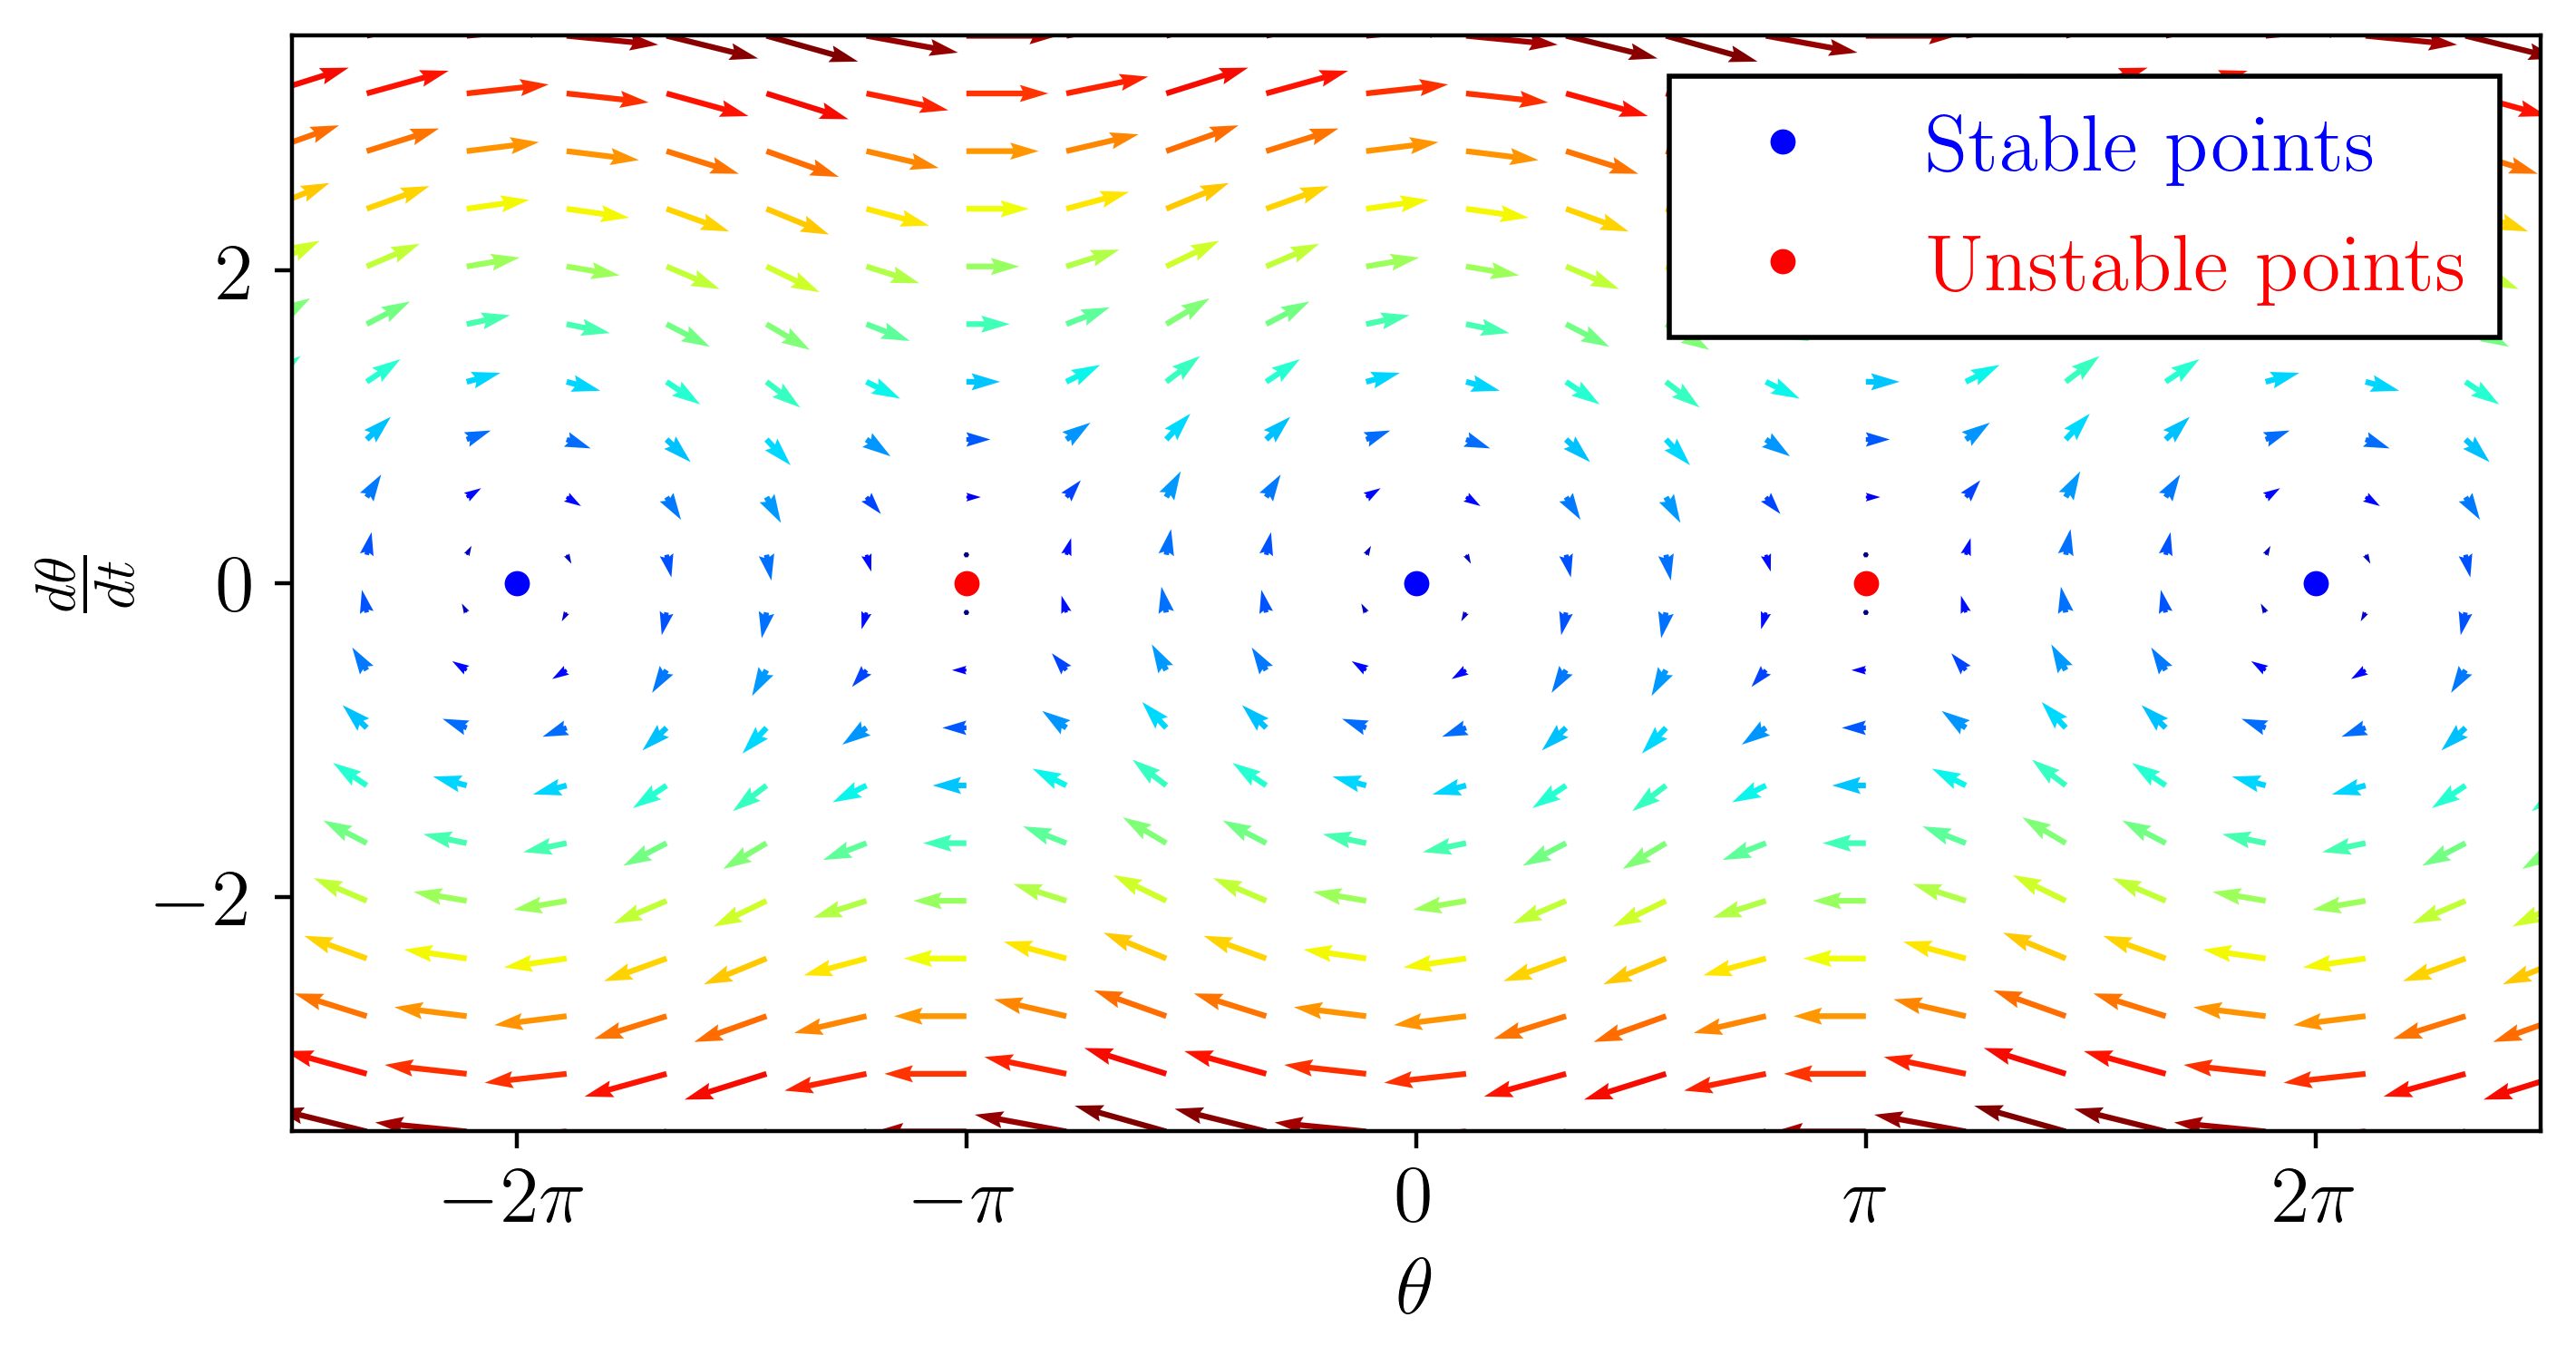

In [92]:
# Based on https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

# Plot settings.
figure = plt.figure(figsize=(8, 4), dpi=400)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$')
plt.xlim([-(5/2)*np.pi, (5/2)*np.pi])
plt.ylim([-3.5, 3.5])
plt.xticks(np.arange(-2*np.pi, 2*np.pi+np.pi, step=(np.pi)), [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])

q = 0 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

# Definition of ODE separated in outputs.
def f(Y, t):
    y1, y2 = Y
    return [y2, -(g/L)*np.sin(y1)-(q/m)*y2]

#
# Creating phase picture as vector map.
#

# Input values for the function.
xin = np.linspace(-3*np.pi, 3*np.pi, 28)
yin = np.linspace(-3.5, 3.5, 20)
Y1, Y2 = np.meshgrid(xin, yin) # Combining input values in an array.

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # Defining empty vector arrays for horizontal and vertical components.

# Cycling through every pair of inputs, calculating the output vectors for each and storing them in the empty vector arrays.
NI, NJ = Y1.shape 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        dy = f([x, y], t)
        u[i,j] = dy[0]
        v[i,j] = dy[1]

mag = np.sqrt(u*u+v*v) # Calculating magnitude of vectors for color map.
Q = plt.quiver(Y1, Y2, u, v, mag, cmap=plt.cm.jet) # Plotting vector map.
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], 'bo', markersize=4, label=r'Stable points') # Plotting attractor points.
plt.plot([-np.pi, np.pi], [0, 0], 'ro', markersize=4, label=r'Unstable points') # Plotting unstable points.
plt.legend(labelcolor='linecolor', fancybox=False, facecolor='white', edgecolor='black', framealpha=1, loc='upper right') # Legend settings.

plt.savefig('/home/pedro/Desktop/IA\'/phase_exact_simple_noplot.svg', dpi=400, facecolor='w', edgecolor='w') # Saving figure.

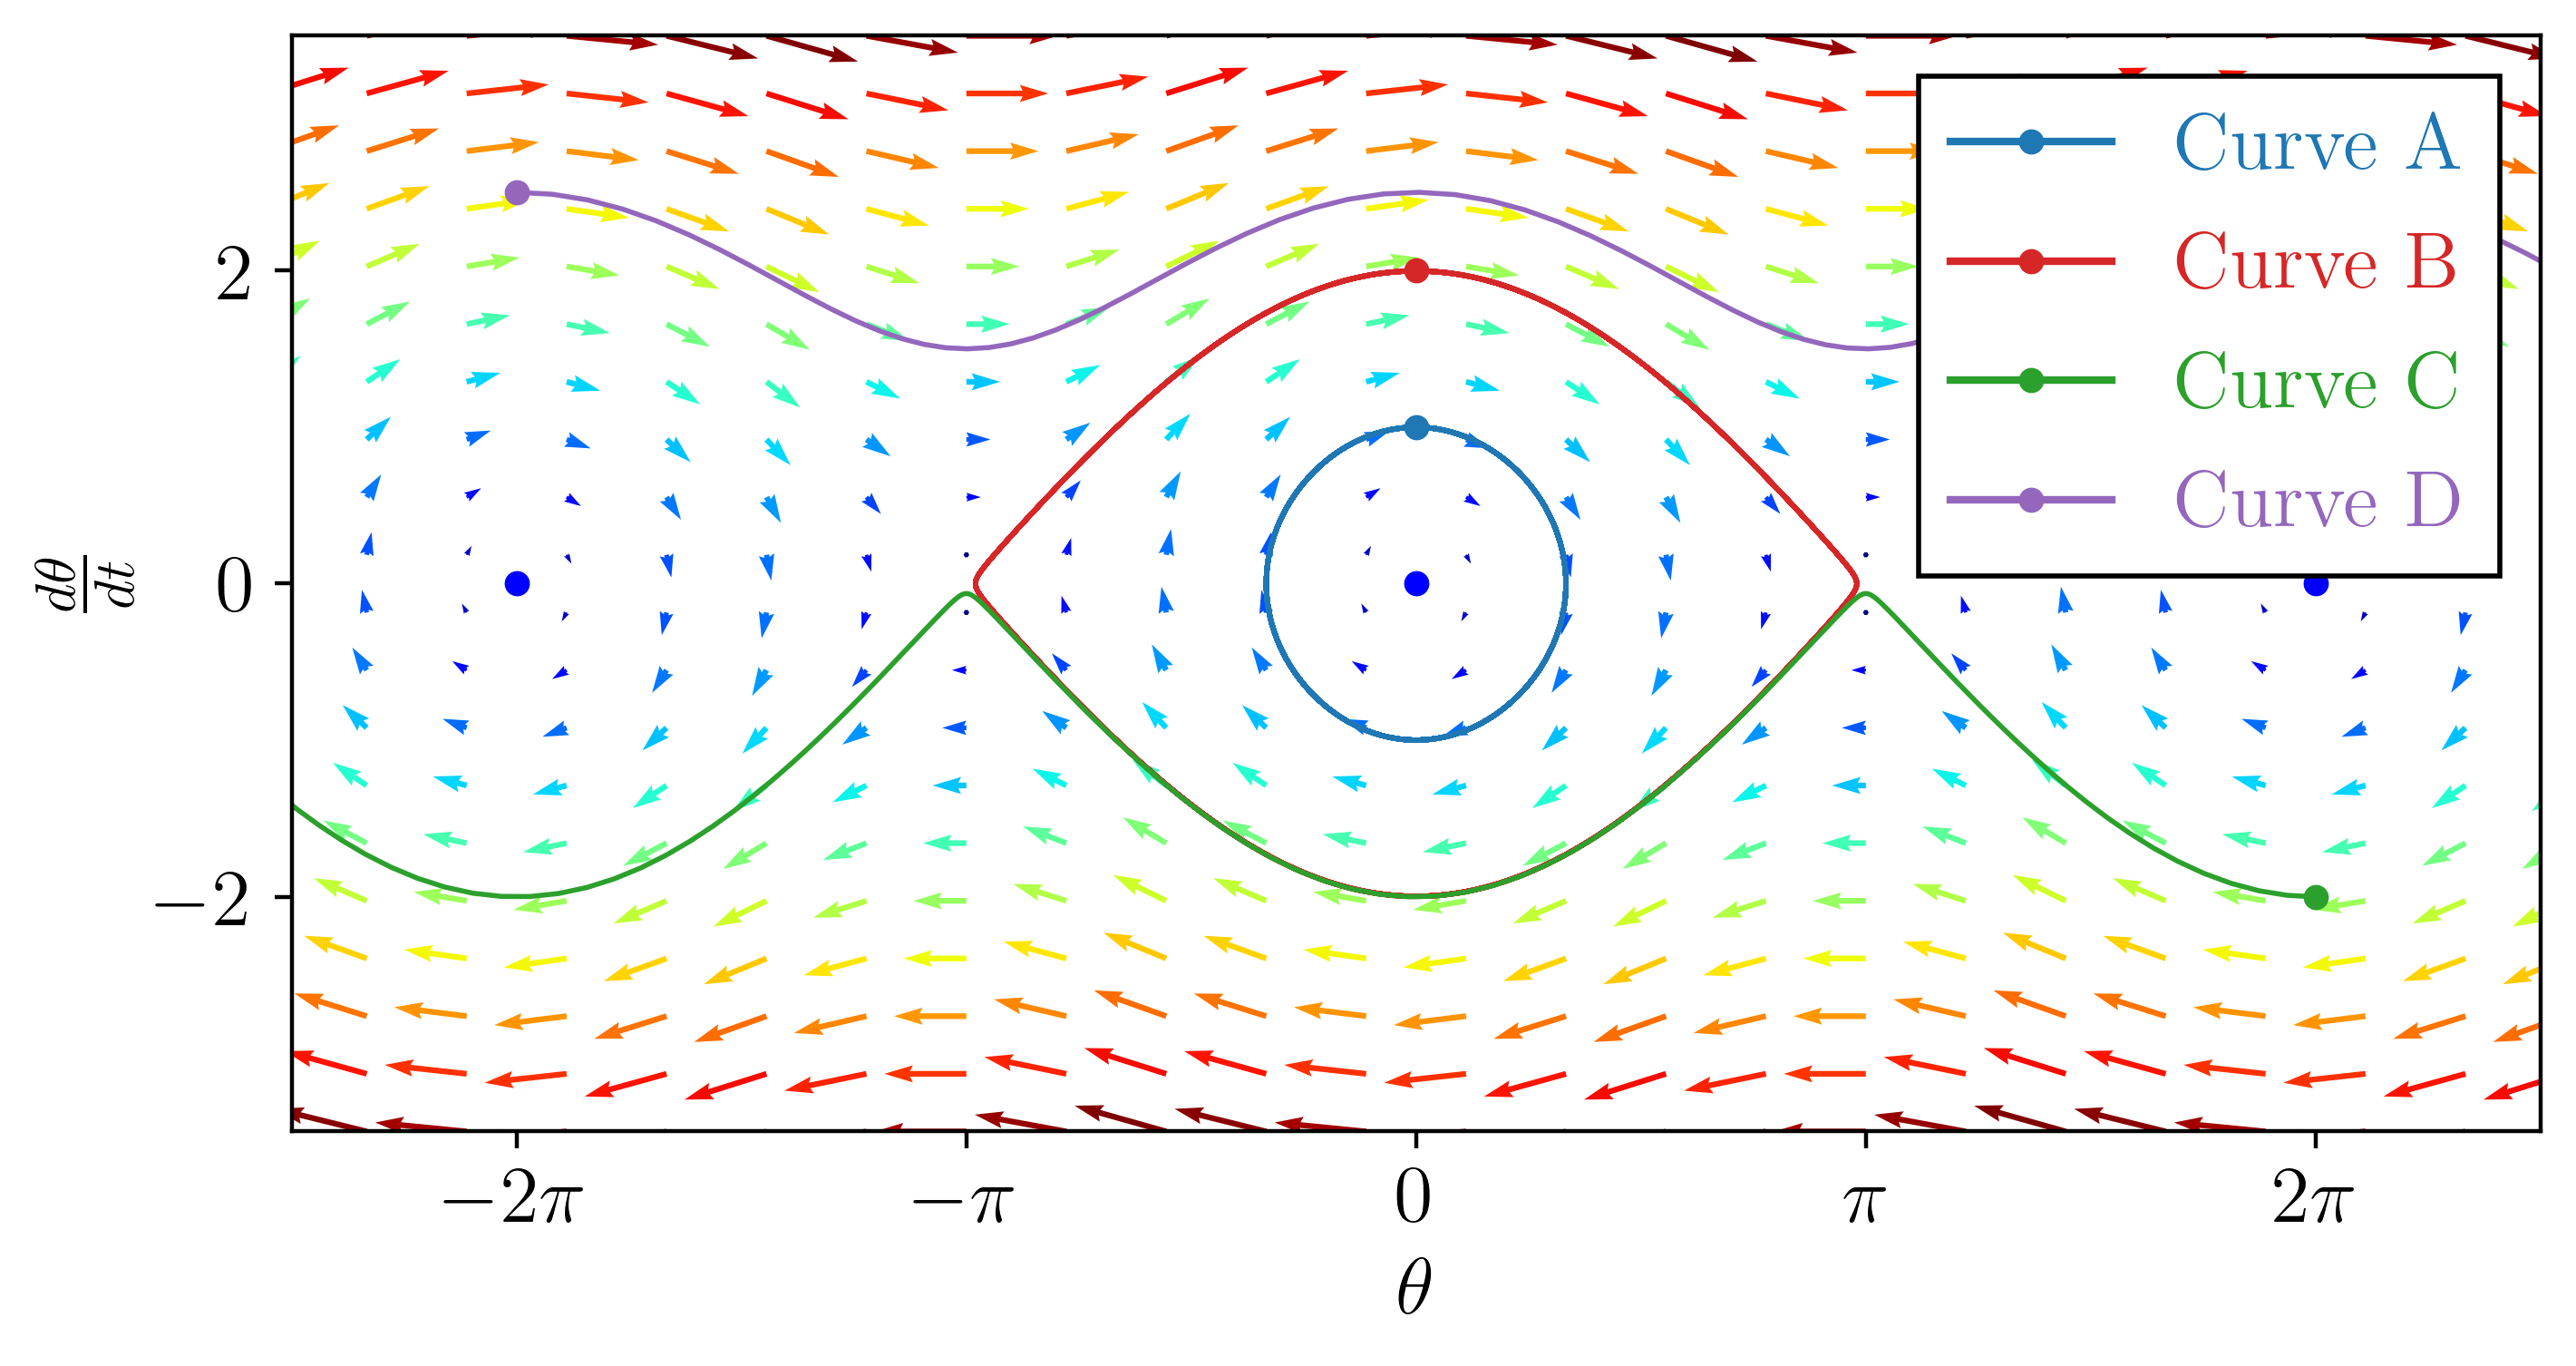

In [98]:
# Based on https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

# Plot settings.
figure = plt.figure(figsize=(8, 4), dpi=400)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$')
plt.xlim([-(5/2)*np.pi, (5/2)*np.pi])
plt.ylim([-3.5, 3.5])
plt.xticks(np.arange(-2*np.pi, 2*np.pi+np.pi, step=(np.pi)), [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])

q = 0 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

# Definition of ODE separated in outputs.
def f(Y, t):
    y1, y2 = Y
    return [y2, -(g/L)*np.sin(y1)-(q/m)*y2]

#
# Creating phase picture as vector map.
#

# Input values for the function.
xin = np.linspace(-3*np.pi, 3*np.pi, 28)
yin = np.linspace(-3.5, 3.5, 20)
Y1, Y2 = np.meshgrid(xin, yin) # Combining input values in an array.

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # Defining empty vector arrays for horizontal and vertical components.

# Cycling through every pair of inputs, calculating the output vectors for each and storing them in the empty vector arrays.
NI, NJ = Y1.shape 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        dy = f([x, y], t)
        u[i,j] = dy[0]
        v[i,j] = dy[1]

mag = np.sqrt(u*u+v*v) # Calculating magnitude of vectors for color map.
Q = plt.quiver(Y1, Y2, u, v, mag, cmap=plt.cm.jet) # Plotting vector map.
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], 'bo', markersize=4) # Plotting attractor points.

#
# Plotting some solutions of the differential equation.
#

# Importing package 'odeint' which calculates solutions of ODEs.
from scipy.integrate import odeint

# Plot settings.
colours = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
labels = [r'Curve A', r'Curve B', r'Curve C', r'Curve D']

y1_0 = [0, 0, 2*np.pi, -2*np.pi] # Values for the horizontal axis.
y2_0 = [1, 1.999, -2.001, 2.5] # Values for the vertical axis.

sol = [] # Solution array.

# Cycling through initial values for the angular velocity and amplitude.
for i in range(len(y1_0)):
    span = np.linspace(0, 200, 2000) # Defining a span for the data points that will be calculated.
    p0 = [y1_0[i], y2_0[i]] # Starting point of each solution curve.
    plt.plot(y1_0[i], y2_0[i], marker='o', markersize=4, color=colours[i], label=labels[i]) # Plotting 'p0'.
    sol.append(odeint(f, p0, span)) # Calculating solution array 'sol' for ODE 'f' starting on point 'p0' and with span 'span'.
    plt.plot(sol[i][:, 0], sol[i][:, 1], linestyle='-', linewidth=1, color=colours[i]) # Plotting the solution curve from the solution array 'sol'.

plt.legend(labelcolor='linecolor', fancybox=False, facecolor='white', edgecolor='black', framealpha=1, loc='upper right') # Legend settings.

plt.savefig('/home/pedro/Desktop/IA\'/phase_exact_simple_plot.svg', dpi=400, facecolor='w', edgecolor='w') # Saving figure.

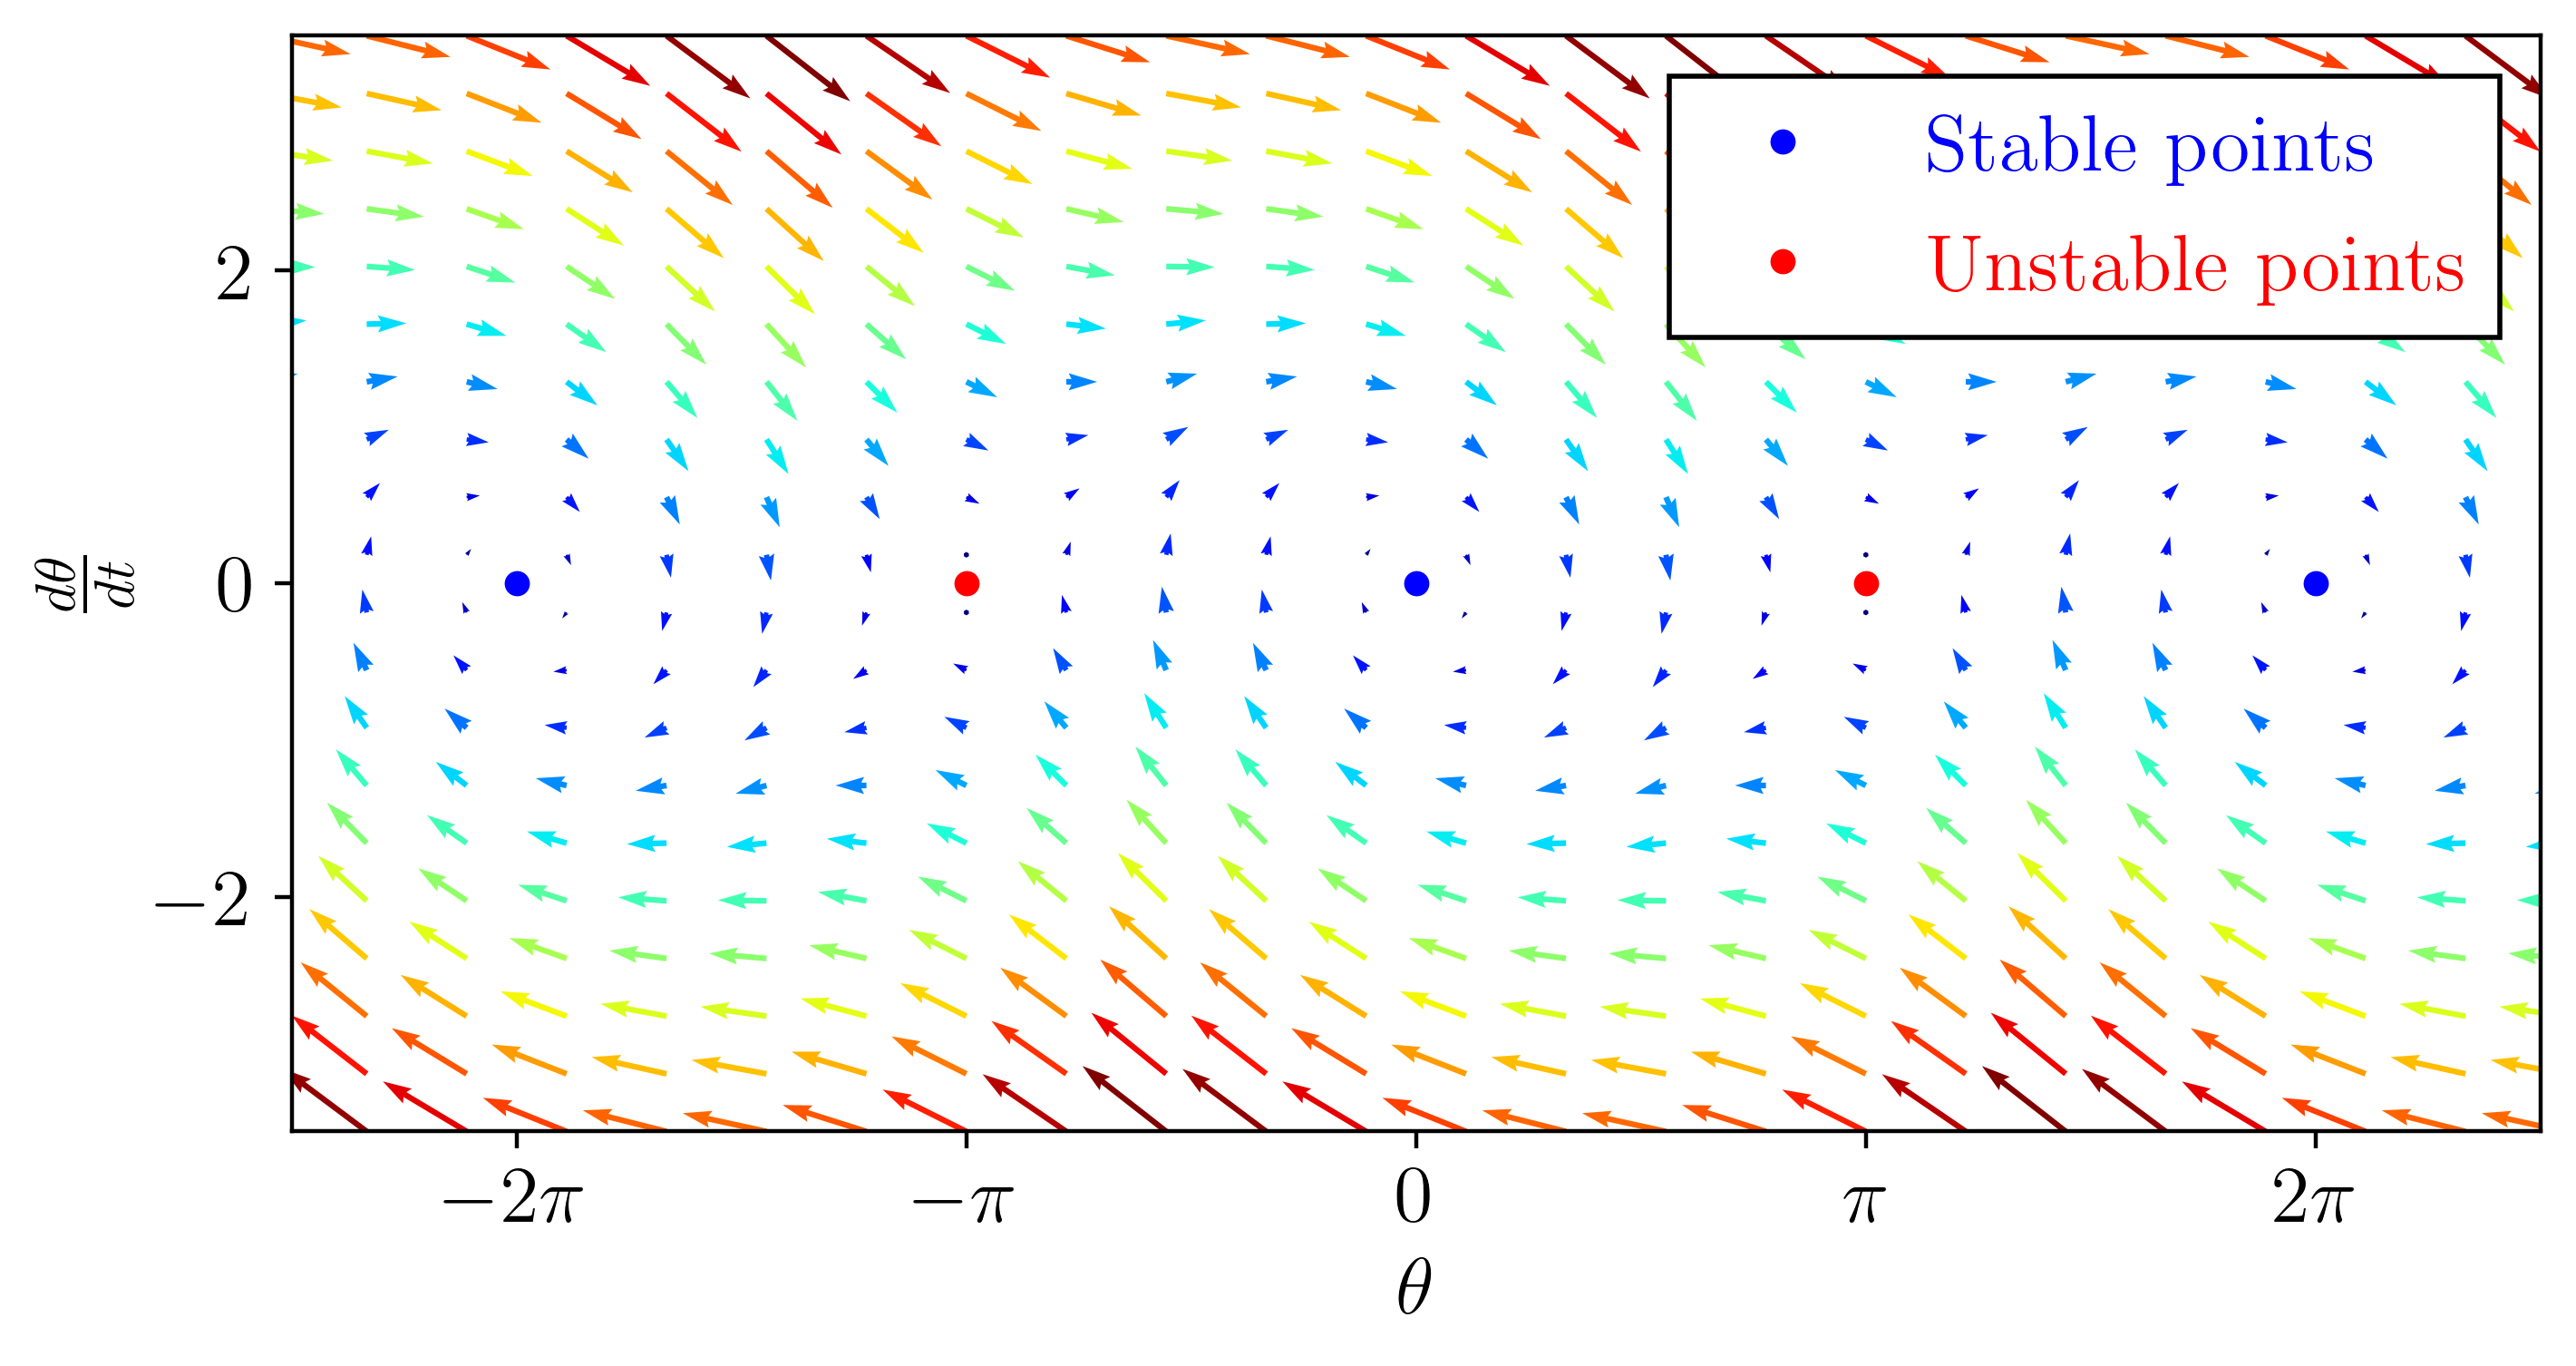

In [99]:
# Based on https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

# Plot settings.
figure = plt.figure(figsize=(8, 4), dpi=400)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$')
plt.xlim([-(5/2)*np.pi, (5/2)*np.pi])
plt.ylim([-3.5, 3.5])
plt.xticks(np.arange(-2*np.pi, 2*np.pi+np.pi, step=(np.pi)), [r'$-2\pi$',r'$-\pi$',r'$0$',r'$\pi$',r'$2\pi$'])

q = 0.5 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

# Definition of ODE separated in outputs.
def f(Y, t):
    y1, y2 = Y
    return [y2, -(g/L)*np.sin(y1)-(q/m)*y2]

#
# Creating phase picture as vector map.
#

# Input values for the function.
xin = np.linspace(-3*np.pi, 3*np.pi, 28)
yin = np.linspace(-3.5, 3.5, 20)
Y1, Y2 = np.meshgrid(xin, yin) # Combining input values in an array.

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # Defining empty vector arrays for horizontal and vertical components.

# Cycling through every pair of inputs, calculating the output vectors for each and storing them in the empty vector arrays.
NI, NJ = Y1.shape 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        dy = f([x, y], t)
        u[i,j] = dy[0]
        v[i,j] = dy[1]

mag = np.sqrt(u*u+v*v) # Calculating magnitude of vectors for color map.
Q = plt.quiver(Y1, Y2, u, v, mag, cmap=plt.cm.jet) # Plotting vector map.
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], 'bo', markersize=4, label=r'Stable points') # Plotting attractor points.
plt.plot([-np.pi, np.pi], [0, 0], 'ro', markersize=4, label=r'Unstable points') # Plotting unstable points.
plt.legend(labelcolor='linecolor', fancybox=False, facecolor='white', edgecolor='black', framealpha=1, loc='upper right') # Legend settings.

In [3]:
# Based on https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

# Plot settings.
figure = plt.figure(figsize=(8, 4), dpi=400)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d\theta}{dt}$')
plt.xlim([-(5/2)*np.pi, (5/2)*np.pi])
plt.ylim([-3.5, 3.5])
plt.xticks(np.arange(-2*np.pi, 2*np.pi+np.pi, step=(np.pi)), [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])

q = 0.2 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

# Definition of ODE separated in outputs.
def f(Y, t):
    y1, y2 = Y
    return [y2, -(g/L)*np.sin(y1)-(q/m)*y2]

#
# Creating phase picture as vector map.
#

# Input values for the function.
xin = np.linspace(-3*np.pi, 3*np.pi, 28)
yin = np.linspace(-3.5, 3.5, 20)
Y1, Y2 = np.meshgrid(xin, yin) # Combining input values in an array.

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape) # Defining empty vector arrays for horizontal and vertical components.

# Cycling through every pair of inputs, calculating the output vectors for each and storing them in the empty vector arrays.
NI, NJ = Y1.shape 
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        dy = f([x, y], t)
        u[i,j] = dy[0]
        v[i,j] = dy[1]

mag = np.sqrt(u*u+v*v) # Calculating magnitude of vectors for color map.
Q = plt.quiver(Y1, Y2, u, v, mag, cmap=plt.cm.jet) # Plotting vector map.
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], 'bo', markersize=4) # Plotting attractor points.

#
# Plotting some solutions of the differential equation.
#

# Importing package 'odeint' which calculates solutions of ODEs.
from scipy.integrate import odeint

# Plot settings.
colours = ['tab:blue', 'tab:green', 'tab:purple']
labels = [r'Curve A', r'Curve B', r'Curve C', ]

y1_0 = [-2*np.pi, -2*np.pi, (4/3)*np.pi] # Values for the horizontal axis.
y2_0 = [2.3, 2.75, 0] # Values for the vertical axis.

sol = [] # Solution array.

t1 = 2

# Cycling through initial values for the angular velocity and amplitude.
for i in range(len(y1_0)):
    span = np.linspace(0, 200, 2000) # Defining a span for the data points that will be calculated.
    p0 = [y1_0[i], y2_0[i]] # Starting point of each solution curve.
    plt.plot(y1_0[i], y2_0[i], marker='o', markersize=4, color=colours[i], label=labels[i]) # Plotting 'p0'.
    sol.append(odeint(f, p0, span)) # Calculating solution array 'sol' for ODE 'f' starting on point 'p0' and with span 'span'.
    plt.plot(sol[i][:, 0], sol[i][:, 1], linestyle='-', linewidth=1, color=colours[i]) # Plotting the solution curve from the solution array 'sol'.
    
plt.legend(labelcolor='linecolor', fancybox=False, facecolor='white', edgecolor='black', framealpha=1) # Legend settings.

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=latex)
 restricted \write18 enabled.
fmtutil: fmtutil is using the following fmtutil.cnf files (in precedence order):
fmtutil:   c:/program files/texlive/2022/texmf-dist/web2c/fmtutil.cnf
fmtutil: fmtutil is using the following fmtutil.cnf file for writing changes:
fmtutil:   c:/users/pedro/.texlive2022/texmf-config/web2c/fmtutil.cnf
fmtutil [INFO]: writing formats under c:/users/pedro/.texlive2022/texmf-var/web2c
fmtutil [INFO]: --- remaking latex with pdftex
fmtutil: running `pdftex -ini   -jobname=latex -progname=latex -translate-file=cp227.tcx *latex.ini' ...
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (INITEX)
 restricted \write18 enabled.
 (c:/Program Files/texlive/2022/texmf-dist/web2c/cp227.tcx)
entering extended mode
(c:/Program Files/texlive/2022/texmf-dist/tex/latex/latexconfig/latex.ini
(c:/Program Files/texlive/2022/texmf-dist/tex/generic/tex-ini-files/pdftexconfi
g.tex)
(c:/Program Files/texlive/2022/texmf-dist/tex/latex/base/latex.ltx
(c:/Program Files/texlive/2022/texmf-dist/tex/latex/base/texsys.cfg)
./texsys.aux found


\@currdir set to: ./.


Assuming \openin and \input 
have the same search path.


Defining UNIX/DOS style filename parser.

catcodes, registers, parameters,
LaTeX2e <2022-11-01> patch level 1
! LaTeX requires expl3.
<argument> \errmessage {LaTeX requires expl3}
                                             \batchmode \read -1 to \reserve...
l.1151   }
          

fmtutil [ERROR]: running `pdftex -ini   -jobname=latex -progname=latex -translate-file=cp227.tcx *latex.ini <nul' return status: 1
fmtutil [ERROR]: returning error due to option --strict
fmtutil [INFO]: log file copied to: c:/users/pedro/.texlive2022/texmf-var/web2c/pdftex/latex.log
fmtutil [INFO]: disabled formats: 6
fmtutil [INFO]: not selected formats: 54
fmtutil [INFO]: failed to build: 1 (pdftex/latex)
fmtutil [INFO]: total formats: 61
fmtutil [INFO]: exiting with status 1
C:\Program Files\texlive\2022\bin\win32\runscript.tlu:915: command failed with exit code 1:
perl.exe "c:\Program Files\texlive\2022\texmf-dist\scripts\texlive\fmtutil.pl"  --user --byfmt latex
Running the command C:\Program Files\texlive\2022\bin\win32\fmtutil-user.exe
I can't find the format file `latex.fmt'!

kpathsea: Running mktexfmt latex.fmt

The command name is C:\Program Files\texlive\2022\bin\win32\mktexfmt




<Figure size 3200x1600 with 1 Axes>

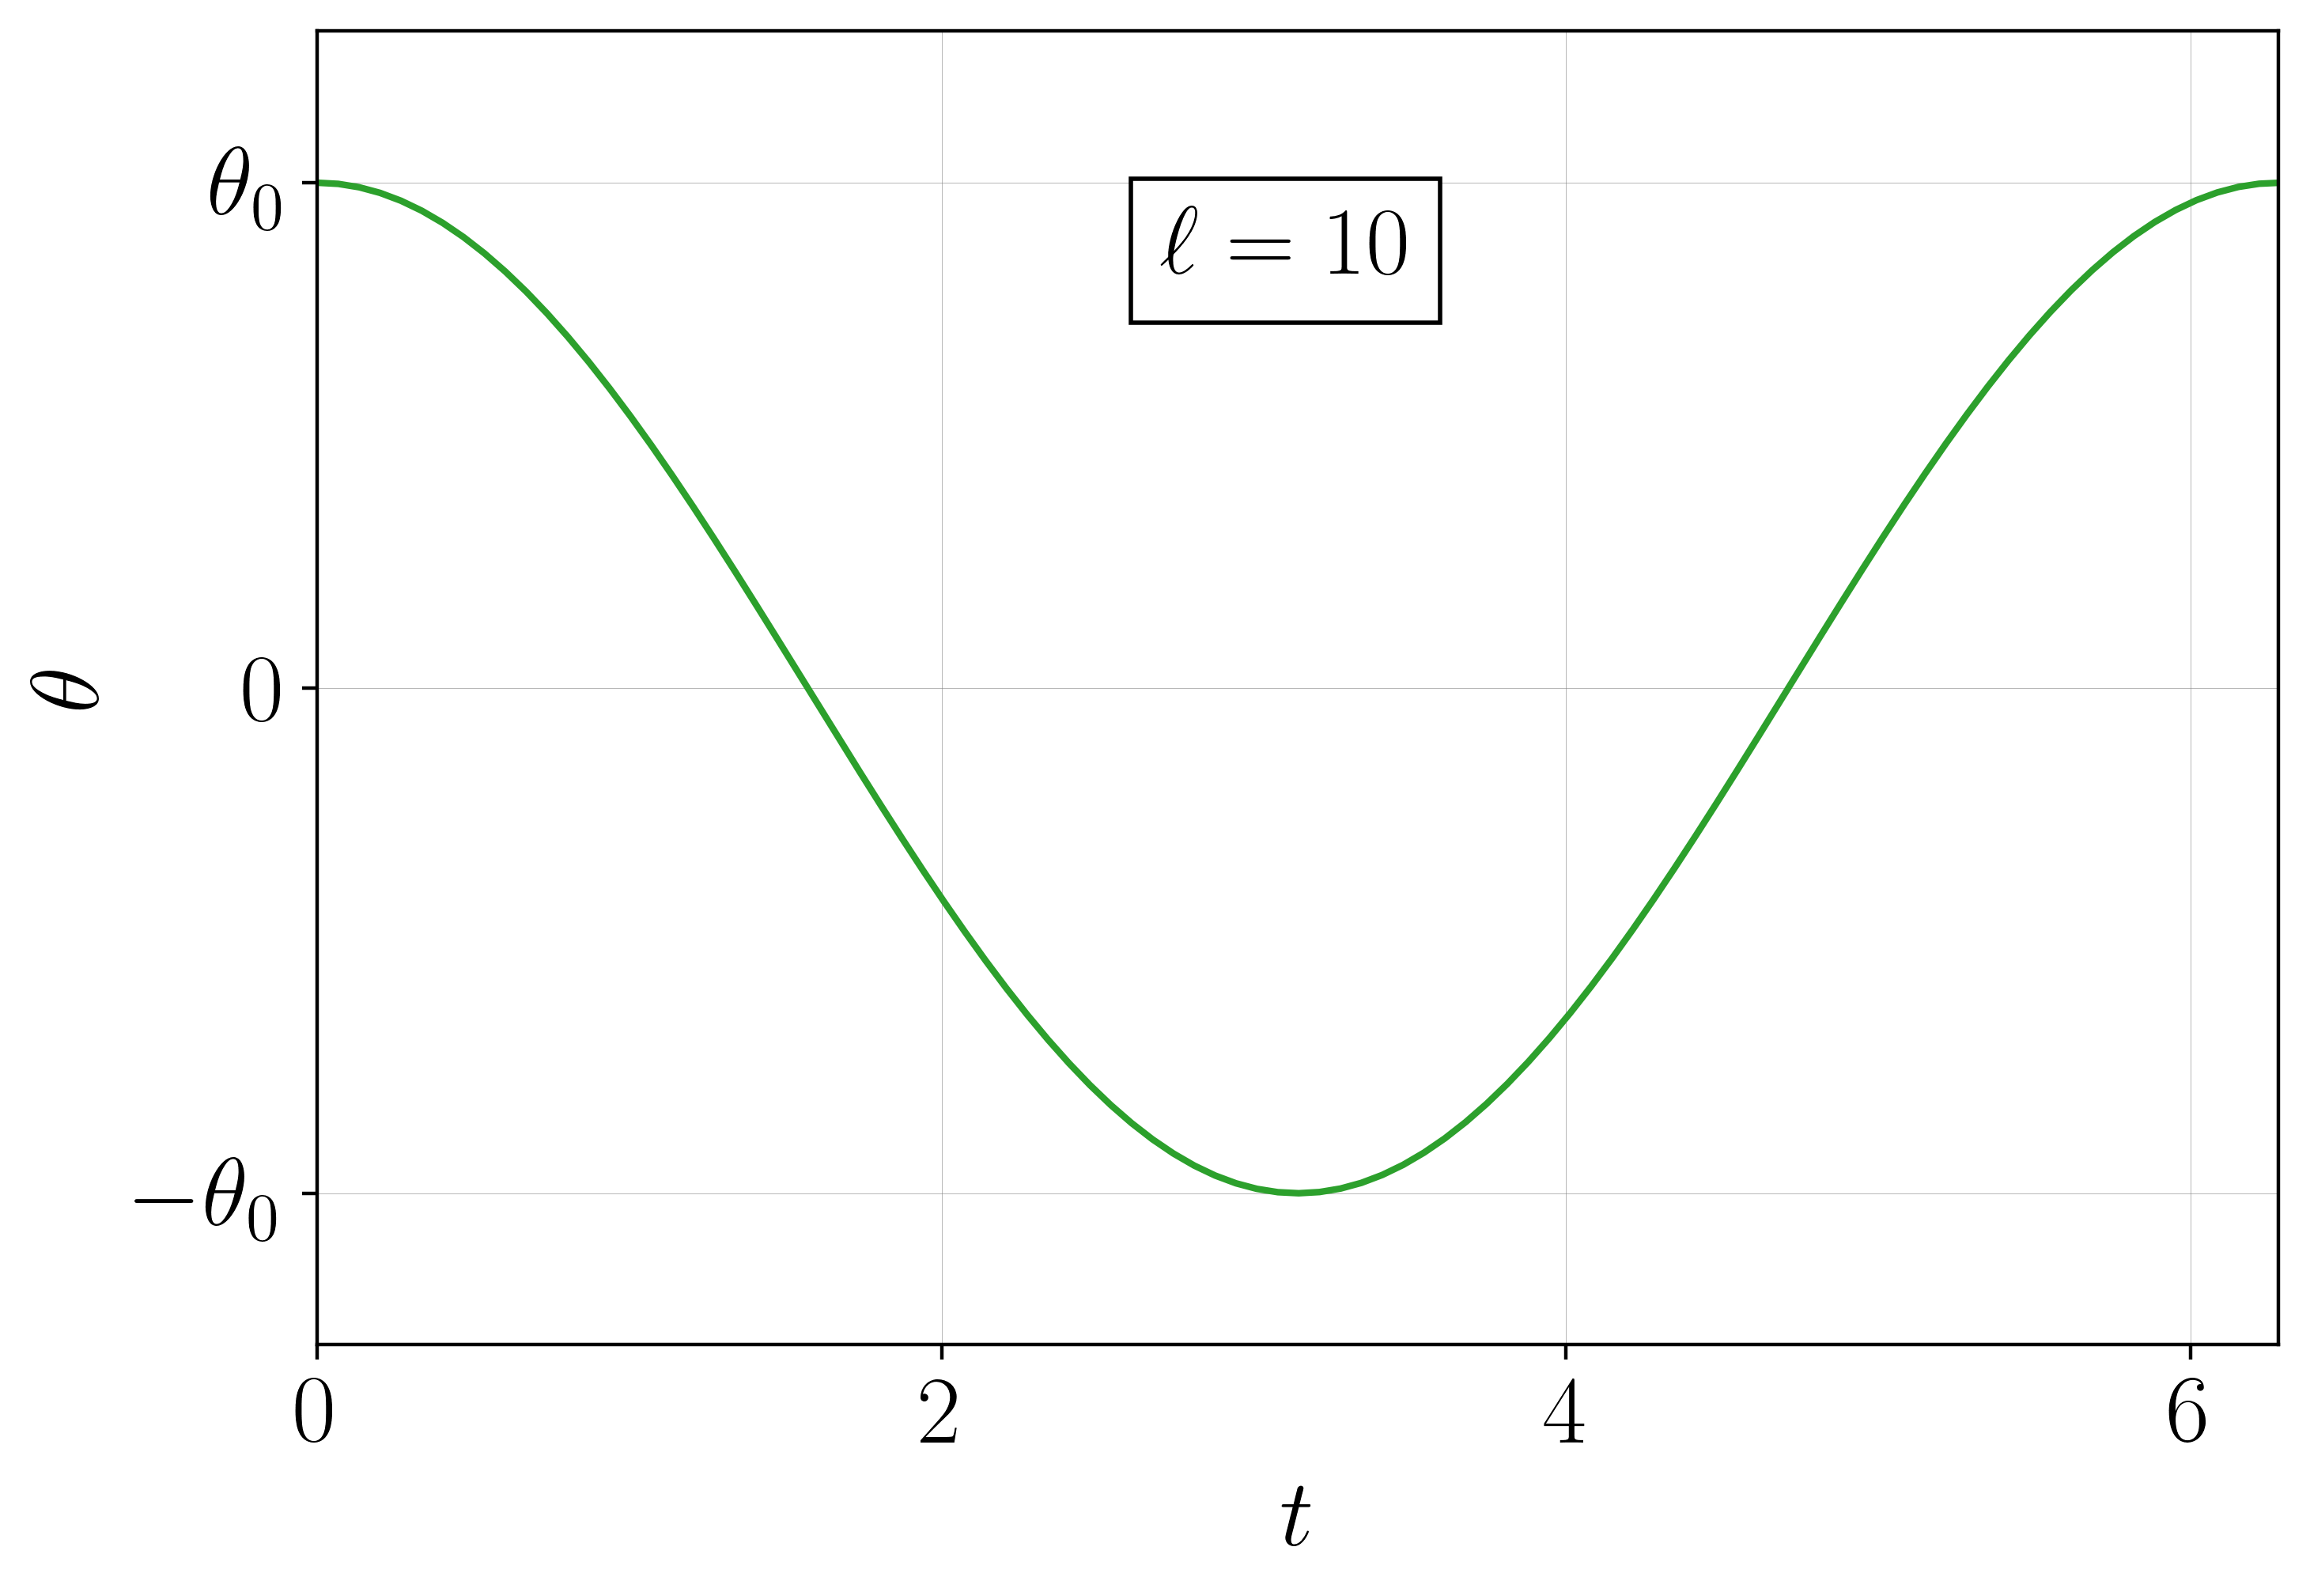

In [79]:
# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 22})
rc('text', usetex=True)
plt.rcParams['grid.linewidth'] = 0.1

# Plot settings.
figure = plt.figure(figsize=(8, 5.5), dpi=400)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.xlim([0, 2*np.pi])
plt.ylim([-1.3, 1.3])
#plt.xticks(np.arange(-2*np.pi, 2*np.pi+np.pi, step=(np.pi)), [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])
plt.yticks(np.arange(-1, 1+1, step=(1)), [r'$-\theta_0$', r'$0$', r'$\theta_0$'])
plt.grid(which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

q = 0.2 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

zin = np.linspace(0, 20, 300)

z_0 = 1

def f(t):
    return z_0*np.cos(g/L*t)

plt.plot(zin, f(zin), color='tab:green')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='square', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
plt.text(2.7, 0.95, r'$\ell=10$', fontsize=22,
        verticalalignment='top', bbox=props)

plt.savefig('/home/pedro/Desktop/IA\'/shm1.png', dpi=400, facecolor='w', edgecolor='w') # Saving figure.

Text(16, 1.1, '$\\!\\!\\!\\!\\ell\\ =10\\\\[6pt]b\\ =0.4\\\\[6pt]\\dot{\\theta_0}=0$')

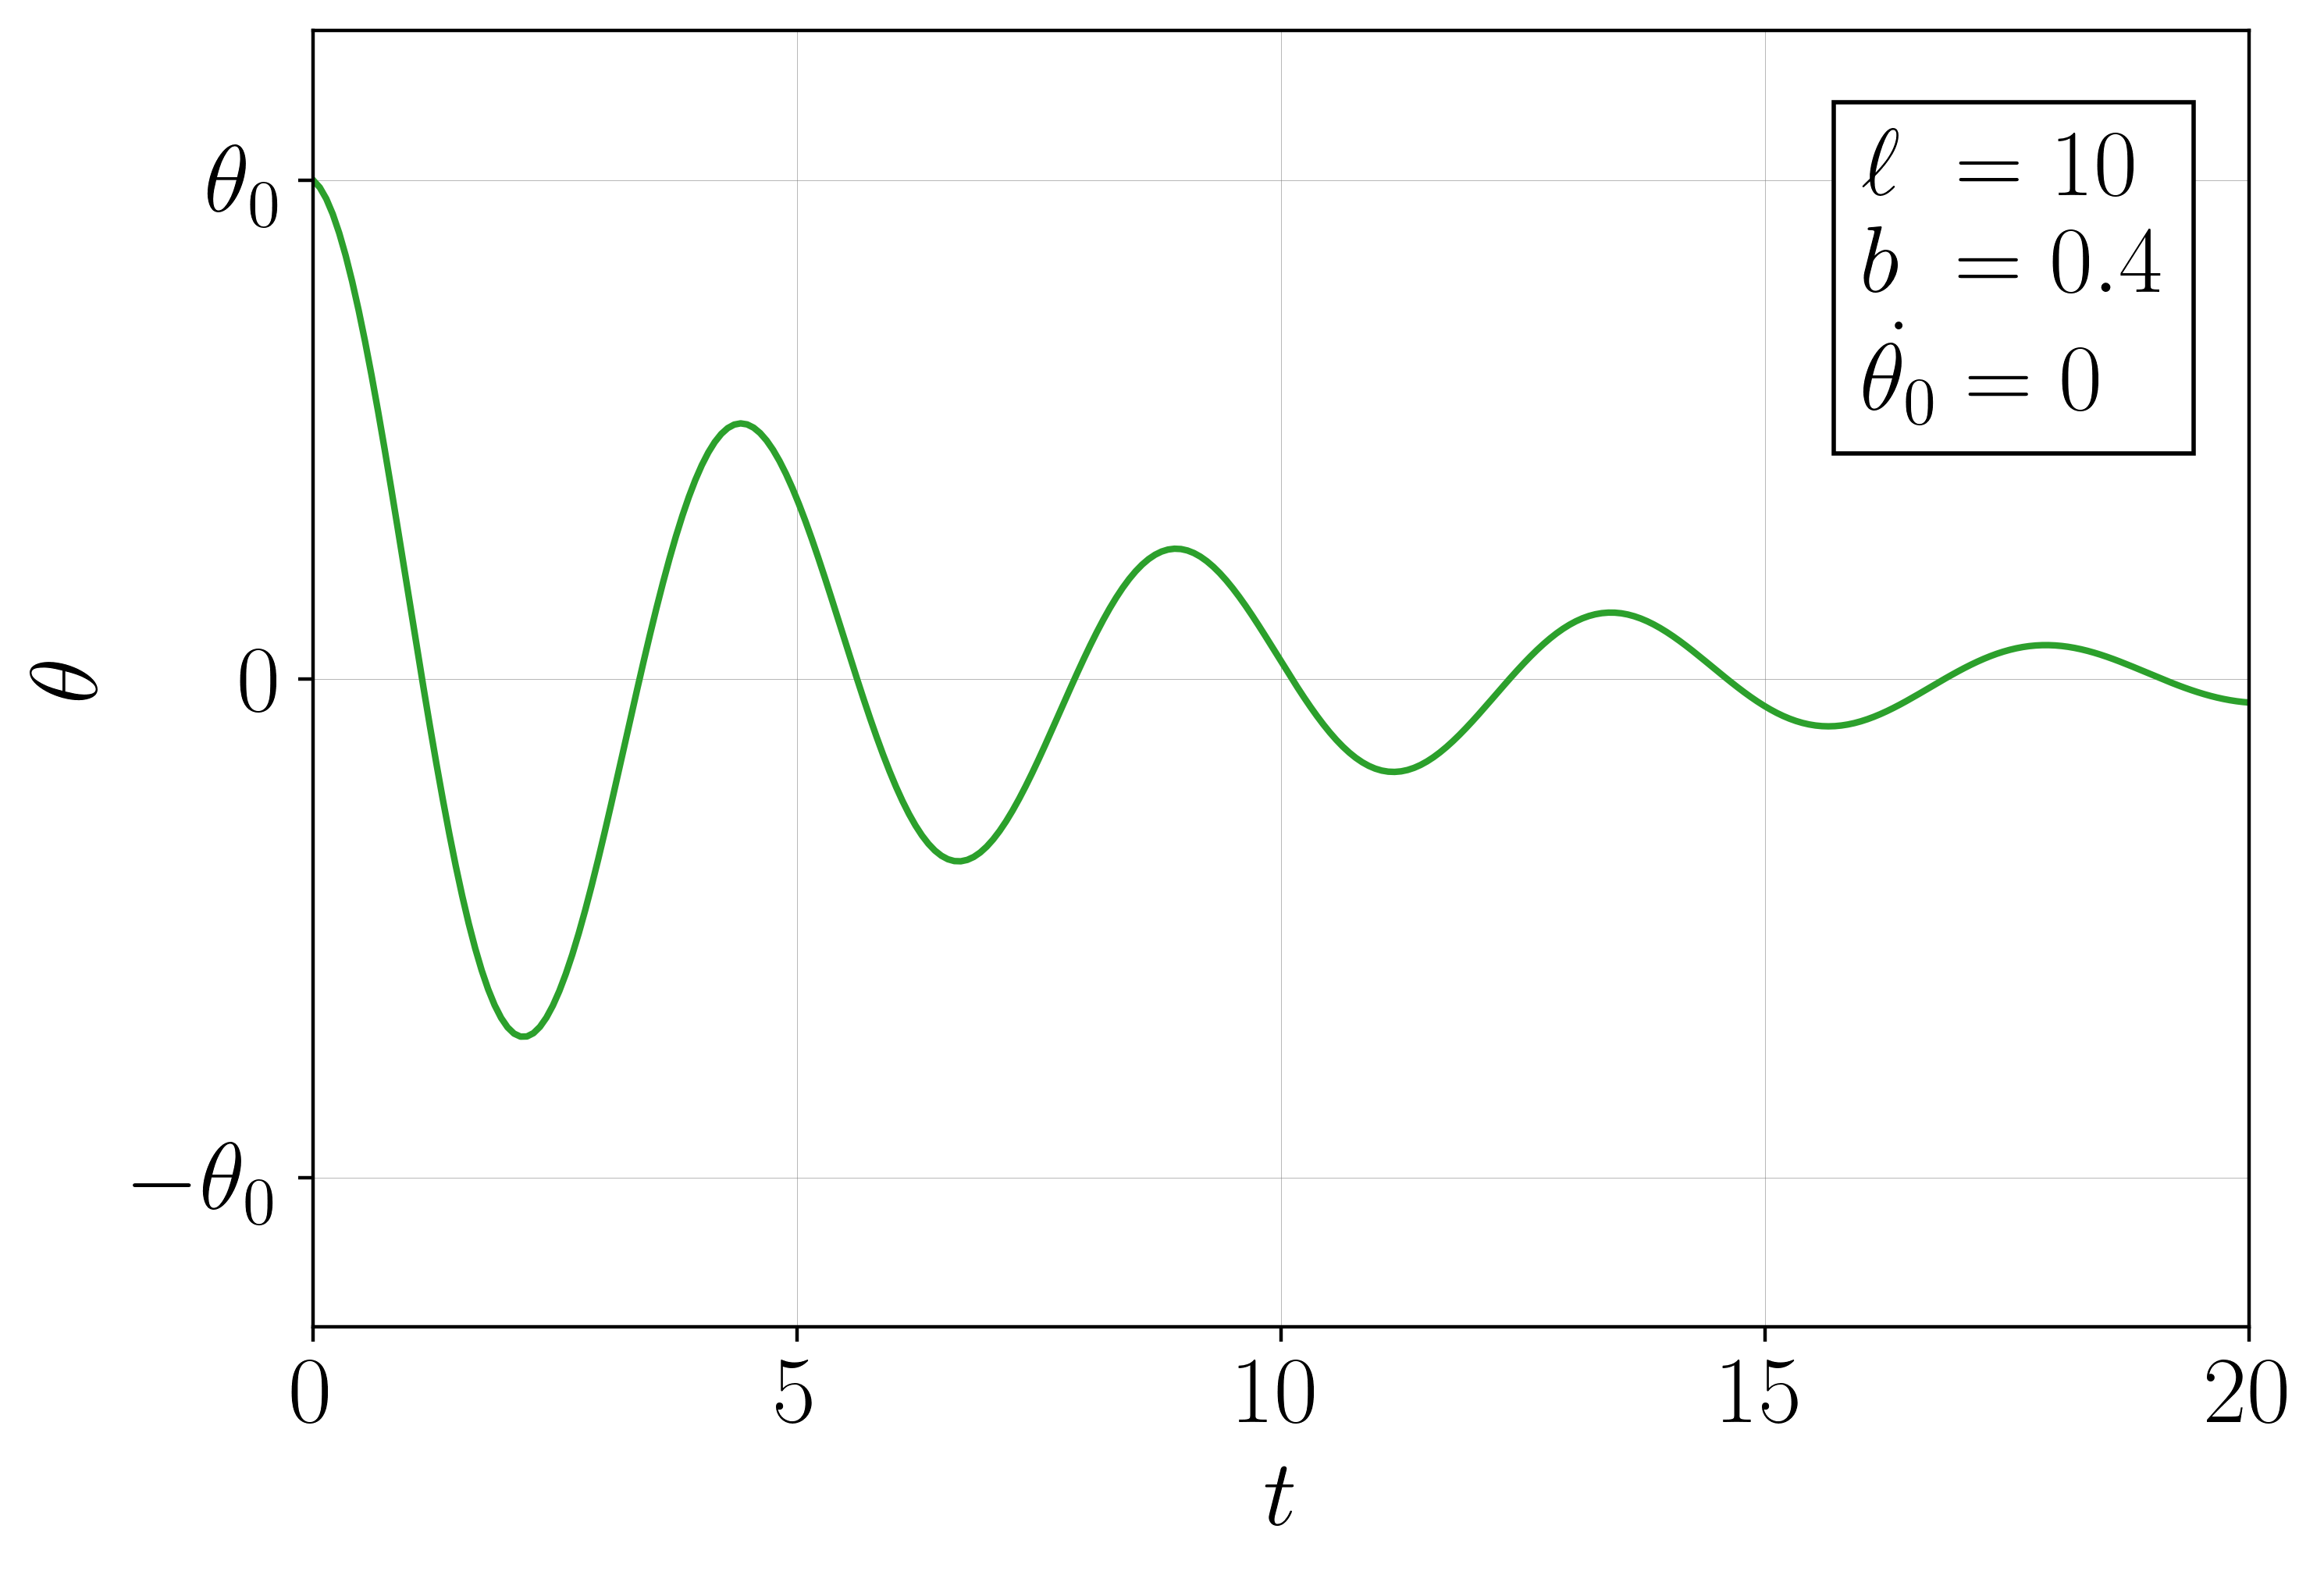

In [1]:
# Importing mathematics packages.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 22})
rc('text', usetex=True)
plt.rcParams['grid.linewidth'] = 0.1

# Plot settings.
figure = plt.figure(figsize=(8, 5.5), dpi=400)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.xlim([0, 20])
plt.ylim([-1.3, 1.3])
#plt.xticks(np.arange(-2*np.pi, 2*np.pi+np.pi, step=(np.pi)), [r'$-2\pi$',r'$-\pi$',r'0',r'$\pi$',r'$2\pi$'])
plt.yticks(np.arange(-1, 1+1, step=(1)), [r'$-\theta_0$', r'$0$', r'$\theta_0$'])
plt.grid(which='major', axis='both', color='gray', linestyle='-', linewidth=0.1)

b = 0.3 # Friction coefficient.
t = 0 # Time.
m = 1 # Mass.
g = 10 # Gravitational acceleration.
L = 10 # Length.

c_1=1
c_2=0

zin = np.linspace(0, 20, 300)

z_0 = 1

def f(t):
    return np.e**(-(b*t/(2*m)))*(c_1*np.cos(t*np.sqrt(abs((b/m)**2-4*(g/L))/2))+c_2*np.sin(t*np.sqrt(abs((b/m)**2-4*(g/L))/2)))

plt.plot(zin, f(zin), color='tab:green')

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='square', facecolor='white', alpha=1)

# place a text box in upper left in axes coords
plt.text(16, 1.1, r'$\!\!\!\!\ell\ =10\\[6pt]b\ =0.4\\[6pt]\dot{\theta_0}=0$', fontsize=22,
        verticalalignment='top', bbox=props)

#plt.savefig('/home/pedro/Desktop/IA\'/damped1.png', dpi=400, facecolor='w', edgecolor='w') # Saving figure.